Install OpenCV

In [2]:
#pip install opencv-python 
#pip install opencv-python-headless matplotlib

In [ ]:
# hi

In [2]:
import cv2
print(cv2.__version__)

4.11.0


https://opencv.org/

Image Processing Basics

Loading and Displaying Images

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('dog.jpg')

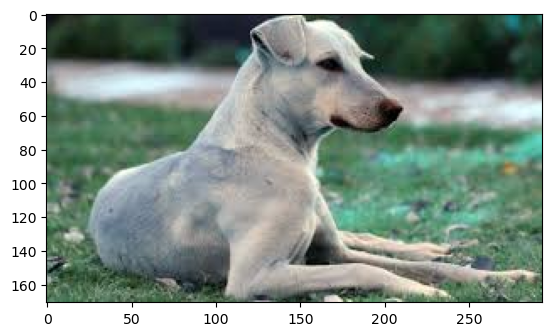

In [5]:
# Display the image
plt.imshow(img)
plt.show()

https://stackoverflow.com/questions/14556545/why-opencv-using-bgr-colour-space-instead-of-rgb

In [6]:
# Convert from BGR to RGB for proper color display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

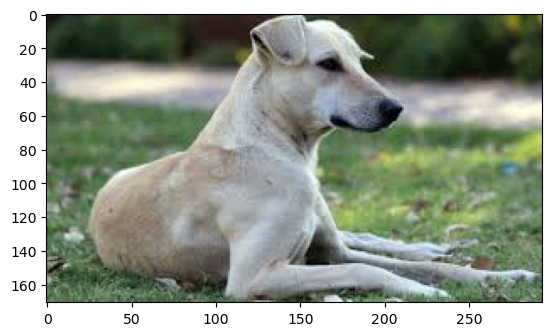

In [7]:
# Display the image
plt.imshow(img_rgb)
plt.show()

In [8]:
img_rgb.shape

(171, 294, 3)

In [9]:
type(img_rgb)

numpy.ndarray

Convert to grayscale

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

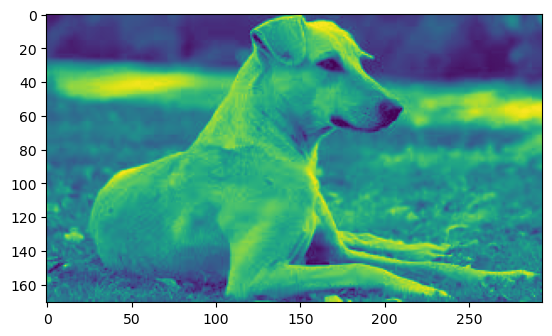

In [11]:
# Display the image
plt.imshow(gray)
plt.show()

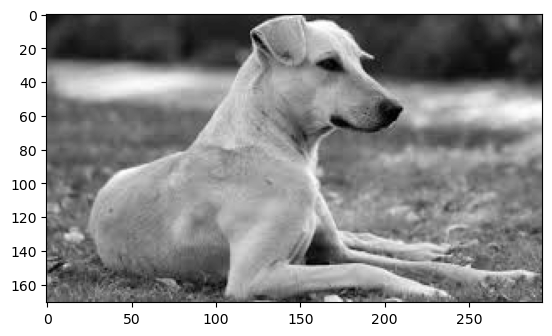

In [12]:
plt.imshow(gray, cmap='gray')  # Specify the color map as 'gray'
plt.show()

In [13]:
gray.shape

(171, 294)

In [14]:
type(gray)

numpy.ndarray

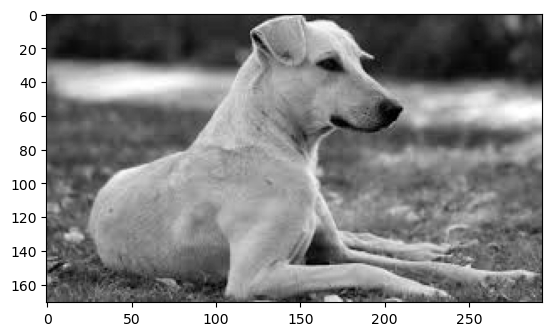

In [15]:
# Display the image
plt.imshow(img_rgb[:,:,0],cmap='gray')
plt.show()

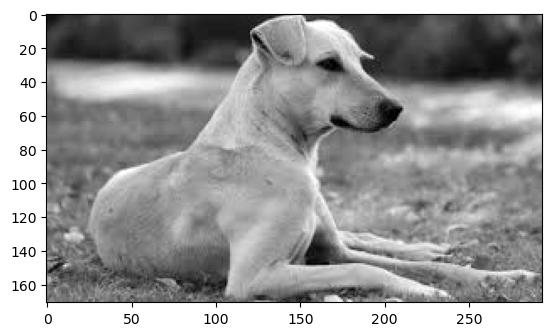

In [16]:
# Display the image
plt.imshow(img_rgb[:,:,1],cmap='gray')
plt.show()

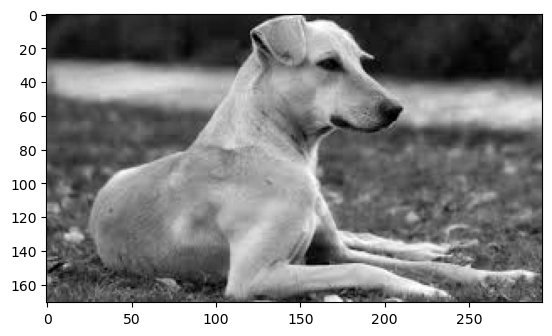

In [17]:
# Display the image
plt.imshow(img_rgb[:,:,2],cmap='gray')
plt.show()

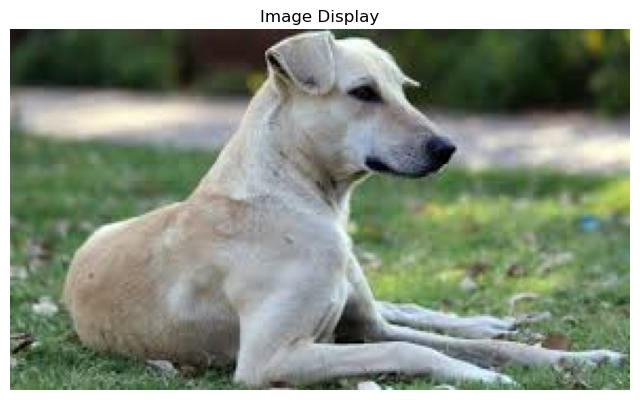

In [18]:
# Create a figure
fig = plt.figure(figsize=(8, 6))  # Specify figure size in inches
# Add a single subplot to the figure
ax = fig.add_subplot(111)  # (1 row, 1 column, 1st subplot)
# Display the image
ax.imshow(img_rgb)
ax.axis('off')  # Turn off axis labels and ticks
ax.set_title("Image Display")  # Set a title for the subplot
# Show the figure
plt.show()

In [19]:
img_rgb.shape

(171, 294, 3)

Resize the image

In [20]:
resized = cv2.resize(img_rgb, (300, 300))

In [21]:
resized.shape

(300, 300, 3)

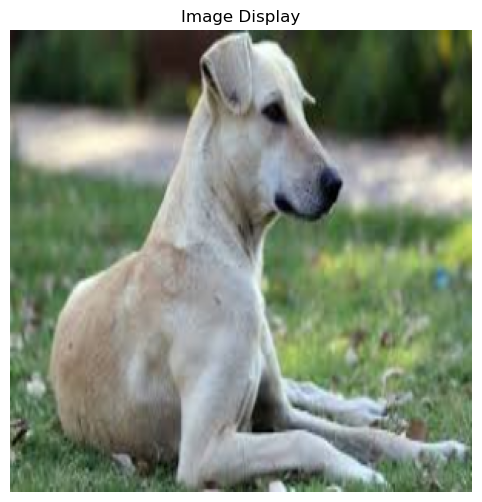

In [22]:
# Create a figure
fig = plt.figure(figsize=(8, 6))  # Specify figure size in inches
# Add a single subplot to the figure
ax = fig.add_subplot(111)  # (1 row, 1 column, 1st subplot)
# Display the image
ax.imshow(resized)
ax.axis('off')  # Turn off axis labels and ticks
ax.set_title("Image Display")  # Set a title for the subplot
# Show the figure
plt.show()

Add shapes on the image

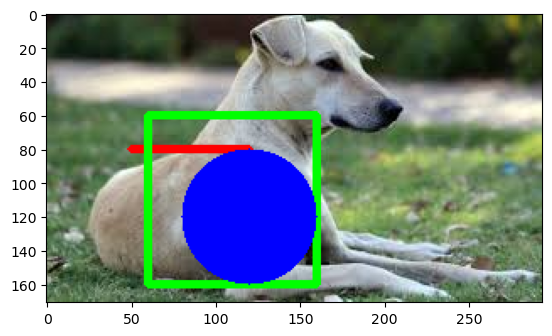

In [23]:
lined_img= img_rgb.copy()
cv2.line(lined_img, (50, 80), (120, 80), (255, 0, 0), 4)
cv2.rectangle(lined_img, (60, 60), (160, 160), (0, 255, 0), 3)
cv2.circle(lined_img, (120, 120), 40, (0, 0, 255), -1)
plt.imshow(lined_img)
plt.show()


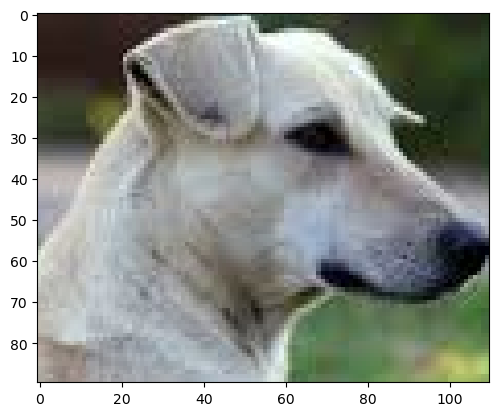

In [25]:
plt.imshow(img_rgb[:90,100:210])

In [26]:
img_rgb[0:90,-110:] = img_rgb[:90,100:210]

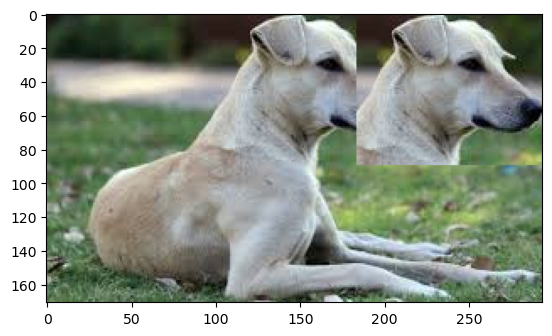

In [27]:
plt.imshow(img_rgb)

Increase the Brightness

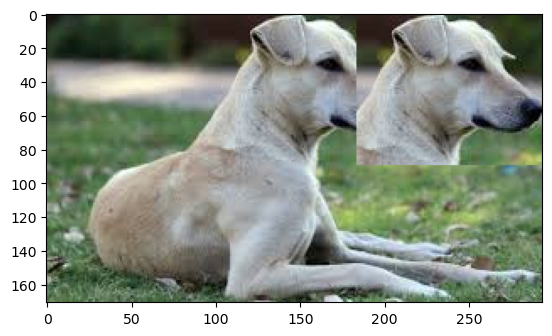

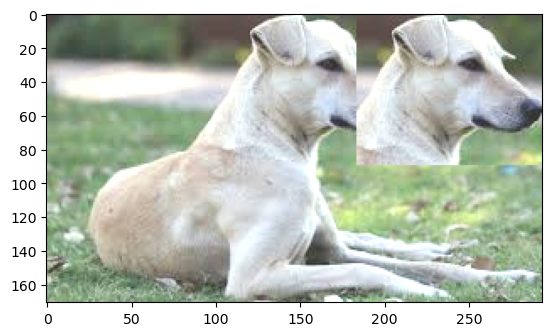

In [28]:
image = img_rgb.copy()
bright_incr = 50

plt.imshow(image)
plt.show()
height = image.shape[0]
width = image.shape[1]
for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=min(image[i][j][k]+bright_incr,255)
plt.imshow(image)

# Inbuilt Function
brightened_image = cv2.add(image, bright_incr)  

Decrease the Brightness [Contrast]

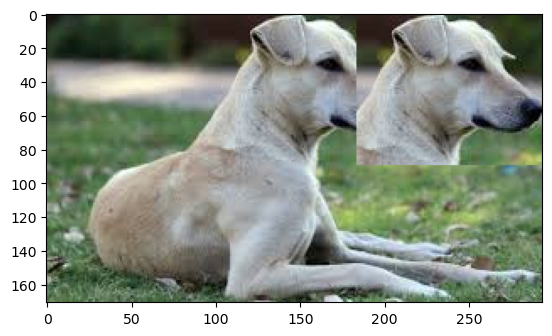

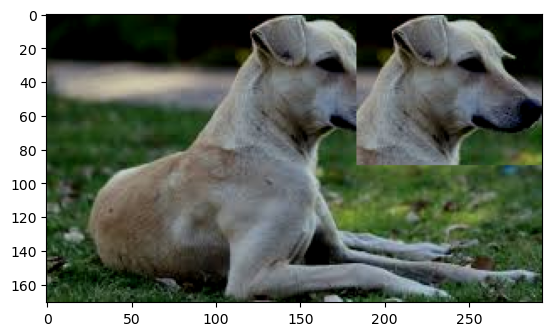

In [29]:
image = img_rgb.copy()
bright_dec = 50

plt.imshow(image)
plt.show()

for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=max(image[i][j][k]-bright_incr,0)
plt.imshow(image)
        
# Inbuilt Function
contrasted_image = cv2.subtract(image, bright_dec) 

Histogram Equalization

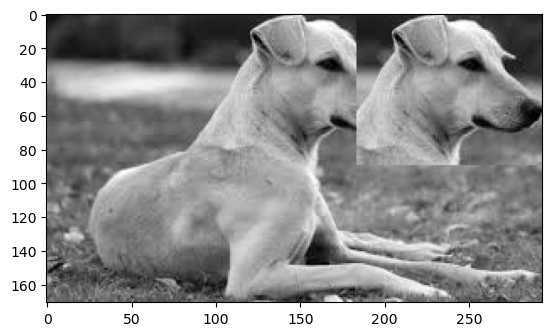

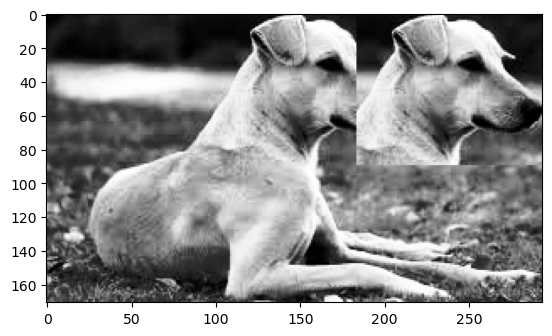

In [30]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

equalized_image = cv2.equalizeHist(gray)
plt.imshow(equalized_image,cmap='gray')
plt.show()

 Blur

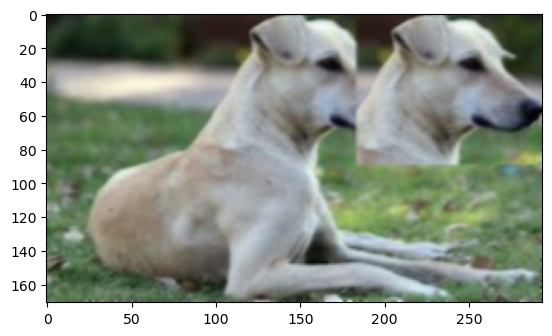

In [48]:
# Average Filter / Simple Blur without library Function 
import numpy as np
image =img_rgb.copy()
for i in range(1,height-1):
    for j in range(1,width-1):
        for k in range(3):
            image[i][j][k]=np.average(image[i-1:i+2,j-1:j+2,k])
plt.imshow(image)

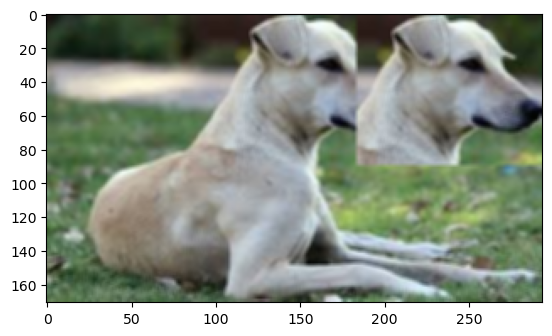

In [33]:
simple_blur = cv2.blur(img_rgb,(3,3))
plt.imshow(simple_blur)

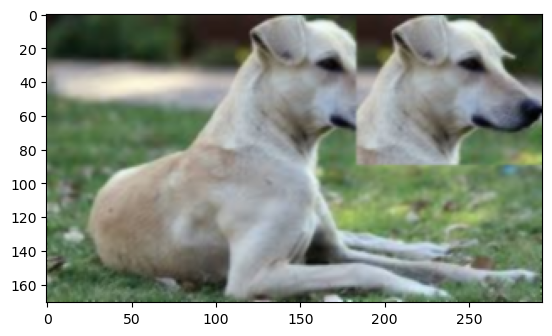

In [34]:
# GaussianBlur Filter without library function
arr = np.array([[1,2,1],[2,4,2],[1,2,1]])
arr = arr / arr.sum()
image =img_rgb.copy()

for i in range(1, height-1):
    for j in range(1, width-1):
        for k in range(3):  
            region = image[i-1:i+2, j-1:j+2, k]
            image[i, j, k] = np.sum(region * arr)

plt.imshow(image)

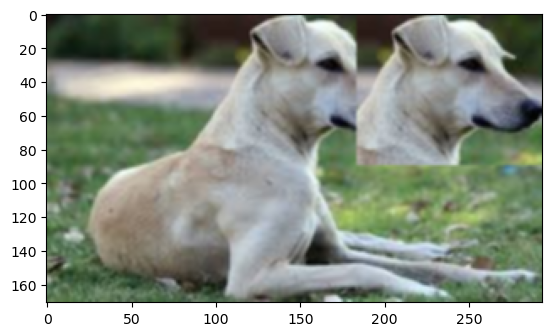

In [35]:
# GaussianBlur Filter with library function
image = img_rgb.copy()
gb=cv2.GaussianBlur(image,(3,3),0)
plt.imshow(gb)

Sharpening

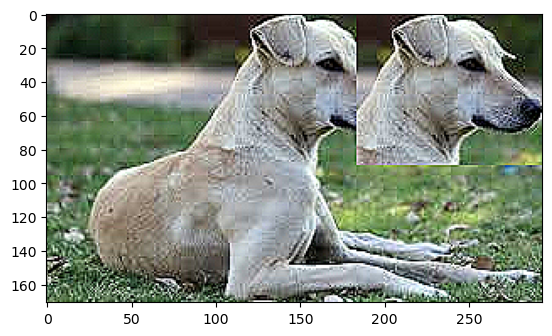

In [36]:
sharpen = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(img_rgb, -1, sharpen)
plt.imshow(sharpened)
plt.show()

Edge Detection

1.Vertical Edges

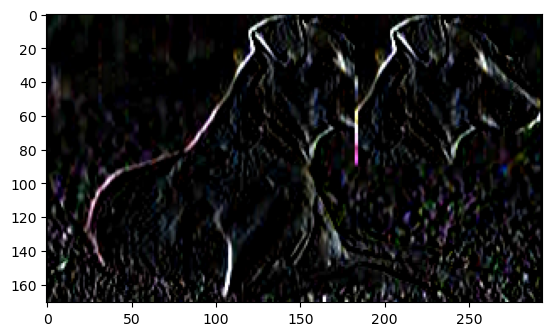

In [37]:
ver_kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

ver_edg = cv2.filter2D(img_rgb, ddepth=-1, kernel=ver_kernel)
plt.imshow(ver_edg)

2.Horizontal Edges

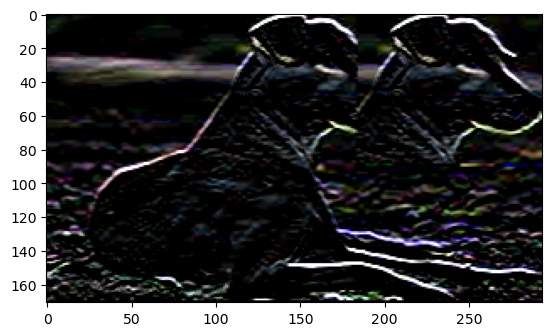

In [38]:
hor_kernel = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

hor_edg = cv2.filter2D(img_rgb, ddepth=-1, kernel=hor_kernel)
plt.imshow(hor_edg)

Take 2 images 1st - dog , 2nd - horse and generate two new images having dog contains horse head and vice versa

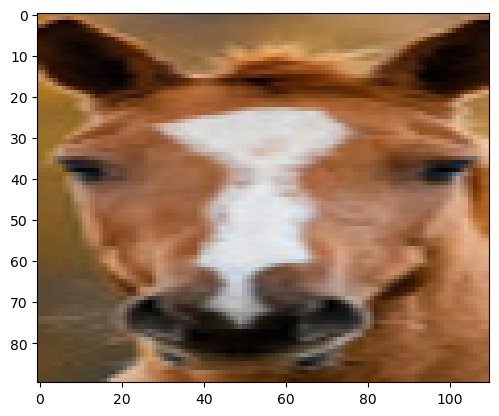

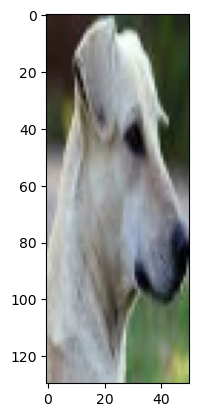

In [46]:
dog =cv2.imread('dog.jpg')
horse = cv2.imread('horse.png')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)
dog_face = dog[:90,100:210]
horse_face= horse[30:160,150:200] 
horse_face_resize=cv2.resize(horse_face,(110,90))
dog_face_resize=cv2.resize(dog_face,(50,130))

plt.imshow(horse_face_resize)
plt.show()
plt.imshow(dog_face_resize)

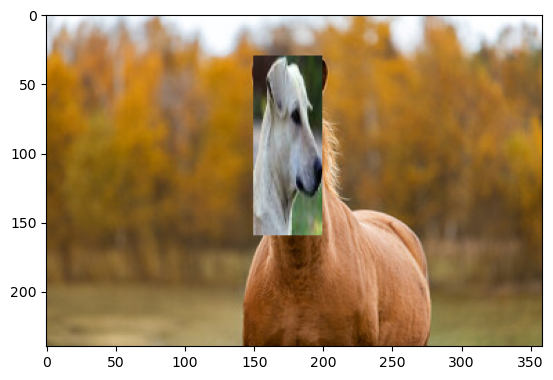

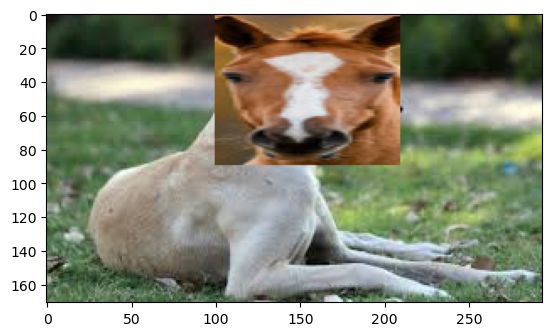

In [47]:
dog[:90,100:210] =horse_face_resize
horse[30:160,150:200] =dog_face_resize
plt.imshow(horse)
plt.show()
plt.imshow(dog)